# 混淆矩陣
<img src="image/confusionMatrix.png" width="400">  

* 精準度(precision): 所有預測為正，實際上為正的比率　$PRE = \frac{TP}{TP + FP}$  
* 召回率(recall): 所有實際上為正，被預測正確的比率　$REC = \frac{TP}{TP + FN}$
* F1-Score: 精準度與召回率的調和平均 $F1 = 2\frac{PRE \times REC}{PRE + REC}$

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#df = pd.read_csv('data/wdbc.data', header=None)
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

## Scikit-Learn 混淆矩陣

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


[[71  1]
 [ 2 40]]


## 混淆矩陣Matplot視覺化

<function matplotlib.pyplot.show(close=None, block=None)>

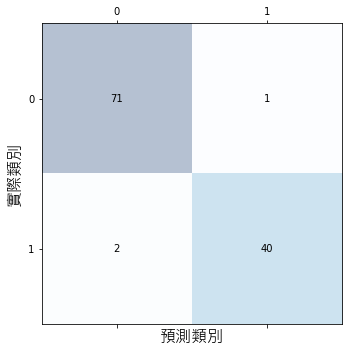

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('預測類別',fontproperties="Microsoft JhengHei",fontsize = 16)
plt.ylabel('實際類別',fontproperties="Microsoft JhengHei",fontsize = 16)

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show

## Scikit-Learn Pre,Rec,F1 Score

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('精確率Pre: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('召回率Rec: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

精確率Pre: 0.976
召回率Rec: 0.952
F1 Score: 0.964


## ROC曲線 
透過改變分類器門檻值觀察偽陽率和真陽率的的曲線，對角線可以被解釋成隨機猜測，如果曲線低於對角線則分類器比隨便瞎猜都還差，相反的曲線越靠近左上方則越好。
* AUC(Area Under the Curve): 曲線下的面積，面積越大代表曲線越靠近左上方，是衡量演算法的標準之一。

In [40]:
#設置plt中文
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('Microsoft JhengHei')

In [50]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np
np.set_printoptions(suppress=True)#取消科學符號

pipe_lr = make_pipeline(StandardScaler(),
                       # PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1, 
                                           C=100.0,
                                           solver='liblinear'))

#X_train2 = X_train[:, [4, 14]]
    

kfold = list(StratifiedKFold(n_splits=3, 
                             random_state=1,shuffle=True).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test]) #回傳預測每個標籤的機率
    #fpr array, shape = [>2]
    #tp rarray, shape = [>2]
    #thresholds array, shape = [n_thresholds]
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1], #標籤為1的機率
                                     pos_label=1)
    print('fpr')
    print(fpr)
    print('tpr')
    print(tpr)
    print('thresholds')
    print(thresholds)
    #加總全部平均y軸的值(tpr) n_splits=3 總共100個點加總
#     mean_tpr += interp(mean_fpr, fpr, tpr)
#     mean_tpr[0] = 0.0 #重置第一個為0
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr,
#              tpr,
#              label='ROC fold %d (area = %0.3f)'
#                    % (i+1, roc_auc))
# #隨機猜測對角線
# plt.plot([0, 1],
#          [0, 1],
#          linestyle='--',
#          color=(0.6, 0.6, 0.6),
#          label='隨機猜測')
# #計算平均y軸值(tpr)
# mean_tpr /= len(kfold)
# #重置y軸最後一個值為1
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, 'k--',
#          label='平均 ROC (area = %0.3f)' % mean_auc, lw=2)
# plt.plot([0, 0, 1],
#          [0, 1, 1],
#          linestyle=':',
#          color='black',
#          label='perfect performance')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.legend(loc="lower right",prop = fontP)

# plt.tight_layout()
# # plt.savefig('images/06_10.png', dpi=300)
# plt.show()

fpr
[0.         0.         0.         0.01052632 0.01052632 0.04210526
 0.04210526 0.05263158 0.05263158 0.07368421 0.07368421 0.95789474
 0.95789474 1.        ]
tpr
[0.         0.36842105 0.78947368 0.78947368 0.9122807  0.9122807
 0.92982456 0.92982456 0.96491228 0.96491228 0.98245614 0.98245614
 1.         1.        ]
thresholds
[2.         1.         0.99999977 0.99999794 0.99780001 0.96004211
 0.79097343 0.68439458 0.59460603 0.12080005 0.09173646 0.
 0.         0.        ]
fpr
[0.         0.         0.         0.02105263 0.02105263 0.09473684
 0.09473684 0.21052632 0.21052632 0.58947368 0.58947368 0.82105263
 0.82105263 1.        ]
tpr
[0.         0.1754386  0.89473684 0.89473684 0.92982456 0.92982456
 0.94736842 0.94736842 0.96491228 0.96491228 0.98245614 0.98245614
 1.         1.        ]
thresholds
[2.         1.         0.8884452  0.64469824 0.24602056 0.00303816
 0.00302922 0.0001252  0.00008909 0.         0.         0.
 0.         0.        ]
fpr
[0.         0.         0.  

<Figure size 504x360 with 0 Axes>

由ROC曲線圖可以知道每個fold都有變異，和每次抽出的資料不同有關。表現的最好是fold 3，它的ROC曲線最靠近左上角。總結來說3個fold都表現的不錯，平均AUC = 0.976。